In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import cmath
import scipy
import scipy.signal

C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


# Discrete-Time System

#### Definizione
Consistono in un insieme di strumenti o algoritmi implementati per effettuare determinate operazioni sui segnali discreti. A livello di notazione, si possono trovare scritti in diversi modi. Se consideriamo un sistema $S$ che riceve in input un segnale $x(n)$, e restituisce in output un sengale $y(n)$, possiamo scrivere in modo equivalente:
$$
\begin{align}
x(n) \xrightarrow{\text{S}} y(n) \\
y(n) = S(x(n))
\end{align}
$$

#### Esempio
Consideriamo il seguente segnale:
$$
\begin{align}
x(n) = \begin{cases} |n| & \mbox{se } \mbox{ -3 $\leq$ $n$ $\leq$ 3} \\ 0 & \mbox{altrimenti} \end{cases}  n = 0, 1, ..., 9;
\end{align}
$$
E consideriamo un sistema $S$ potrebbe anche essere la semplice identità:
$$
\begin{align}
y(n) = x(n)
\end{align}
$$
che però non è certo di grande interesse. Consideriamo invece un sistema $S$ che prevede il delay di 1 unità sul segnale in input. Possiamo definire tale operazione nel seguente modo:
$$
\begin{align}
y(n) = x(n - 1)
\end{align}
$$
Questa operazione la possiamo tra l'altro definire come shift $y(n) = x(n)_{sh}$.

In [32]:
def calc_x_n(n):
    f = lambda x: np.abs(x) if x in range(-3,4) else 0
    f_ = np.vectorize(f)
    out = f_(n)
    return out

In [33]:
def calc_y_n(n):
    out = calc_x_n(n - 1)
    return out

In [34]:
n = np.arange(-6, 6)
x_n = calc_x_n(n)
y_n = calc_y_n(n)

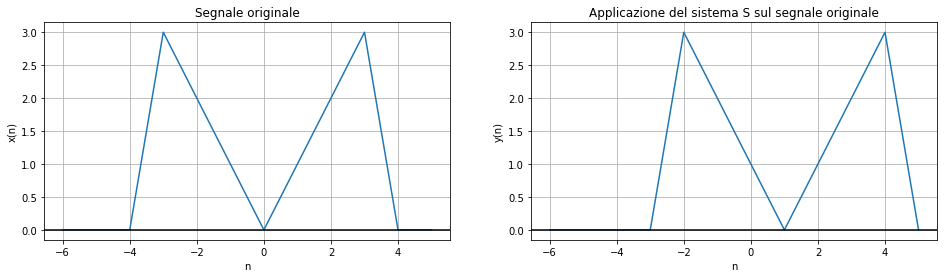

In [35]:
fig, axs = plt.subplots(1,2, figsize=(16, 4))
axs[0].plot(n, x_n)
axs[0].set_title('Segnale originale')
axs[0].set_xlabel('n')
axs[0].set_ylabel('x(n)')
axs[0].grid(True, which='both')
axs[0].axhline(y=0, color='k')

axs[1].plot(n, y_n)
axs[1].set_title('Applicazione del sistema S sul segnale originale')
axs[1].set_xlabel('n')
axs[1].set_ylabel('y(n)')
axs[1].grid(True, which='both')
axs[1].axhline(y=0, color='k')

### Sistemi invarianti nel tempo
Un sistema $S$ è invariante nel tempo se e o solo se:
$$
\begin{align}
x(n) \xrightarrow{\text{S}} y(n)
\end{align}
$$
Implica che 
$$
\begin{align}
x(n - k) \xrightarrow{\text{S}} y(n - k)  \qquad \forall x(n), \forall k
\end{align}
$$

Questa impostazione può essere riscritta nel seguente modo. Se vale la seguente uguaglianza: $y(n, k) = y(n - k) \quad \forall k$, dove  $y(n, k) = S[x(n-k)]$, allora il sistema $S$ è invariante nel tempo. 
#### Esempio
Determinare se il sistema $S$ è invariante nel tempo:
$$
\begin{align}
y(n) = S[x(n)] = x(n) - x(n-1)
\end{align}
$$
Per verificare se effettivamente S è invariante, dobbiamo calcolare $y(n, k)$ e $y(n - k)$, e vedere se coincidono. Perciò:
$$
\begin{align}
y(n, k) = S[x(n - k)] = x(n - k) - x(n- k - 1) \\
y(n - k) = x(n - k) - x(n - k - 1) 
\end{align}
$$
Visto che le due quantità coincidono, S è invariante nel tempo.

### Sistemi lineari
Un sistema $S$ è definito lineare se e solo se:
$$
\begin{align}
S[a_1x_1(n) + a_2x_2(n)] = a_1S[x_1(n)] + a_2S[x_2(n)] \qquad \forall \text{ sequenza input $x_1(n)$, $x_2(n)$ & } \forall \text{ $a_1$, $a_2$} 
\end{align}
$$

In questa definizione sono racchiuse le due proprietà di un sistema lineare: additività e omogeneità. Possiamo scomporre dunque la precedente definizione in due parti distinte. Per la proprietà dell'additività, sappiamo che in $S$ vale la seguente relazione.
$$
\begin{align}
S[x_1(n) + x_2(n)] = S[x_1(n)] + S[x_2(n)] = y_1(n) + y_2(n)
\end{align}
$$
Per la proprietà dell'omogeneità, invece, sappiamo che in $S$ vale la seguente relazione.
$$
\begin{align}
S[a_1x_1(n)] = a_1S[x_1(n)] = a_1y_1(n)
\end{align}
$$

#### Esempio 1
Determinare se il sistema $S$ è lineare:
$$
\begin{align}
y(n) = nx(n)
\end{align}
$$
Il primo step è definire intanto due quantità:
$$
\begin{align}
y_1(n) = nx_1(n)\\
y_2(n) = nx_2(n)
\end{align}
$$
A questo punto, per verificare se effettivamente S è invariante, dobbiamo calcolare $S[a_1x_1(n) + a_2x_2(n)]$ e $a_1y_1(n) + a_2y_2(n)$, e vedere se coincidono.
$$
\begin{align}
S[a_1x_1(n) + a_2x_2(n)] = na_1x_1(n) + na_2x_2(n)
\end{align}
$$
$$
\begin{align}
a_1y_1(n) + a_2y_2(n) = na_1x_1(n) + na_2x_2(n)
\end{align}
$$
Visto che le due quantità coincidono, S è lineare.
#### Esempio 2
Determinare se il sistema $S$ è lineare:
$$
\begin{align}
y(n) = x^2(n)
\end{align}
$$
Come in precedenza, calcoliamo le quantità $S[a_1x_1(n) + a_2x_2(n)]$ e $a_1y_1(n) + a_2y_2(n)$, e vediamo se coincidono.
$$
\begin{align}
S[a_1x_1(n) + a_2x_2(n)] = [a_1x_1(n) + a_2x_2(n)]^2 = a_1^2x_1^2(n) + 2a_1a_2x_1(n)x_2(n)+ a_2^2x_2^2(n)
\end{align}
$$
$$
\begin{align}
a_1y_1(n) + a_2y_2(n) = a_1x_1^2(n) + a_2x_2^2(n)
\end{align}
$$
Visto che le due quantità non coincidono, S non è lineare.

### Sistemi causali
Un sistema è detto causale se l'output al tempo n dipende solo da input passati o dall'input presente, ma non da input futuri. Formalmente:
$$
\begin{align}
y(n) = F[x(n), x(n-1), x(n-2), ...]
\end{align}
$$
Dove $F[.]$ è una qualsiasi funzione. Possiamo dire che il sistema $S$ è causale se e solo se l'output ad un determinato tempo $n$, chiamiamolo $n = n_0$, dipende solo da valori $x(n)$ con $n \leq n_0$.

<i>NB: Sono i sistemi ad essere causali, non i segnali. Ci sono però alcuni libri che definiscono segnali causali tutti quei segnali $x(t)$ tali per cui $x(t) = 0 \text{ per } t<0$.</i>

### Sistemi lineari e invarianti nel tempo (Linear Time Invariant Systems - LTI) 
In molte applicazioni concrete, i sistemi sono modellati come LTI, perchè permettono buone approssimazioni della realtà e offrono anche analisi piuttosto semplici. Ci sono due modi per poter analizzare le caratteristiche di un sistema LTI. Il primo è la definizione della seguente equazione differenziale.
$$
\begin{align}
y(n) = -\sum_{k=1}^{N} a_ky(n-k)+ \sum_{k=0}^{M} b_kx(n-k)
\end{align}
$$
<i> Tale equazione è trattata a partire da pag. 89 del libro [1] </i>

Il secondo modo per poter analizzare il comportamento di un sistema LTI in risposta ad un determinato input è quello di scomporre l'input in una somma di segnali elementari. Questo secondo metodo è di seuguito descritto.

Supponiamo di avere un segnale $x(n)$. Esso può essere descritto da una somma pesata di componenti del segnale "elementari" ${x_k(n)}$ tali per cui:
$$
\begin{align}
x(n) = \sum_{k} c_kx_k(n)
\end{align}
$$
Dove i vari $c_k$ corrispondono all'insieme di coefficienti pesati (che corrispondono all'ampiezza) nella scomposizione del segnale. Ora supponiamo che ad ogni input elementare ${x_k(n)}$, il sistema LTI $S$ restituisca in output una componente elementare ${y_k(n)} = S[{x_k(n)}]$. Sfruttando le proprietà lineari del sistema, possiamo dunque definire il segnale in output $y(n)$ nel seguente modo.
$$
\begin{align}
y(n) = S[x(n)] = S[\sum_{k} c_kx_k(n)] \rightarrow \text{sfrutto la proprietà di linearità} = \sum_{k}c_kS[x_k(n)] = \sum_{k}c_ky_k(n)
\end{align}
$$

### Risposta all'impulso elementare in un sistema LTI
Consideriamo la funzione delta $\delta(n)$ in un sistema LTI. Definiamo la quantità $h(n)$ come la risposta del sistema $S$ all'input $\delta(n)$. Formalmente:
$$
\begin{align}
h(n) = S[\delta(n)]
\end{align}
$$
Essendo il sistema invariante nel tempo, allora vale la relazione:
$$
\begin{align}
h(n-k) = S[\delta(n-k)]
\end{align}
$$


### Scomposizione di un segnale in impulsi elementari. 
Definiamo la componente elementare k-esima del segnale $x(n)$ nel seguente modo:
$$
\begin{align}
x_k(n) = \delta(n-k)
\end{align}
$$
Dove k rappresenta il delay della unit sample sequence. Tale impostazione fa si che la componente $x_k(n)$ sia nulla per ogni valore di $n$, eccetto che per $n = k$, in cui $x_k(n) = 1$. A questo punto supponiamo di moltiplicare il segnale $x(n)$ per la sua componente elementare $\delta(n-k)$. Tale prodotto è dunque nullo per ogni valore di $n$, o che per $n = k$, in cui il prodotto è pari a $x(k)$. Possiamo dunque scrivere:
$$
\begin{align}
x(n)\delta(n-k) = x(k)\delta(n-k)
\end{align}
$$
Se ripetiamo questa operazione per ogni valore di  $- \infty< k <\infty$, e sommiamo tutto, otteniamo un segnale equivalente a $x(n)$. Formalmente:
$$
\begin{align}
x(n) = \sum_{k}x(k)\delta(n-k) = \sum_{k = - \infty}^{\infty}x(k)\delta(n-k)
\end{align}
$$
#### Esempio
Determinare la scomposizione in impulsi elementari della sequenza $x(n)$.
$$
\begin{align}
x(n) = \{2,4,0,3\} \quad n = -1, 0, 1, 2
\end{align}
$$
Semplicemente consideriamo che quando $k = -1$ abbiamo $x(k) = 2$ e $\delta(n-k) = \begin{cases} 1 & \mbox{ se n = -1} \\ 0 & \mbox{altrimenti} \end{cases}$

Con le stesse considerazioni possiamo calcolare i casi in cui $k = 0, k = 1, k = 2$, e riscrivere il segnale $x(n)$ nel seguente modo
<center> 
$$
x(n) = x(-1)\delta(n+1) + x(0)\delta(n-0) + x(1)\delta(n-1) + x(2)\delta(n-2) = \\
= 2\delta(n+1) + 4\delta(n-0) + 0\delta(n-1) + 3\delta(n-2) \Rightarrow \\
x(n) = 2\delta(n+1) + 4\delta(n) + 3\delta(n-2)
$$</center>

### La somma convoluzionale
A questo punto vediamo la risposta del sistema lineare al segnale $x(n)$ scomposto in impulsi elementari. 
$$
\begin{align}
y(n) = S[x(n)] = S\left[\sum_{k = - \infty}^{\infty}x(k)\delta(n-k)\right] \rightarrow \text{sfrutto la proprietà di linearità} = \sum_{k = - \infty}^{\infty}x(k)S\left[\delta(n-k)\right]
\end{align}
$$
A questo punto se il sistema è LTI, posso semplificare nel seguente modo la relazione.
$$
\begin{align}
y(n) = \rightarrow \text{se $S$ è LTI} = \sum_{k = - \infty}^{\infty}x(k)h(n-k) =  x(n) \circledast h(n)
\end{align}
$$
Quella appena scritta è la formula della somma convoluzionale. Questa formula non è altro che la convoluzione tra $x(n)$ e $h(n)$.

### Possibili tipologie di risoluzione per il calcolo dell'output di un sistema LTI
Consideriamo il segnale 
$$
\begin{align}
x(n) = \begin{cases} 1 & \mbox{se } \mbox{ 0 $\leq$ $n$ $\leq$ 2} \\ 0 & \mbox{altrimenti} \end{cases} = \{1,1,1\} \quad \text{con } n = 0,1,2
\end{align}
$$
Determinare la risposta del seguente sistema LTI, applicando la formula della somma convoluzionale.
$$
\begin{align}
y(n) = x(n) - 2x(n-1) + 3x(n-2)
\end{align}
$$
Ci sono varie strategie per risolvere questo esercizio:
- Metodo diretto
- Convoluzione
- Flip & slide: vedi il <a href="https://www.youtube.com/watch?v=kVSUnbgul7g&list=PLuh62Q4Sv7BUSzx5Jr8Wrxxn-U10qG1et&index=3" target="_blank">video</a> dal minuto 13:00.
- Wozny vedi il <a href="https://www.youtube.com/watch?v=kVSUnbgul7g&list=PLuh62Q4Sv7BUSzx5Jr8Wrxxn-U10qG1et&index=3" target="_blank">video</a> dal minuto 24:00.

#### Esempio - Metodo diretto
Semplicemente calcolo punto per punto i valori che assume il vettore output sostituendo i punti. In questo esempio, così elementare, è certamente il modo più veloce.
- $y(n) = 0 \quad \text{con } n \in [-\infty, -1]$
- $y(0) =  1*1 - 2*0 + 3*0 = 1$
- $y(1) =  1*1 - 2*1 + 3*0 = -1$
- $y(2) =  1*1 - 2*1 + 3*1 = 2$
- $y(3) =  1*0 - 2*1 + 3*1 = 1$
- $y(4) =  1*0 - 2*0 + 3*1 = 3$
- $y(n) = 0 \quad \text{con } n \in [5, \infty]$

Perciò, in conclusione si ottiene il seguente vettore output.
<center> 
$$
y(n) = \{1, -1, 2, 1, 3\} \quad \text{con } n = 0, 1, 2, 3, 4
$$ 
</center>

#### Esempio - Convoluzione
Per prima cosa calcoliamo $h(n)$
$$
\begin{align}
h(n) = \delta(n) - 2\delta(n-1) + 3\delta(n-2) = \{1 -2*0 + 3*0, 0 -2*1 + 3*0, 0 -2*0 + 3*1\} \text{ con }\text{ con } n = 0,1,2 =  \{1, - 2, 3\} \text{ con } n = 0,1,2
\end{align}
$$
Ora vediamo i vari casi al variare di $k$.
- Quando $k = 0$ abbiamo $x(k) = 1, h(n-k) = h(n) = \{1, -2, 3\} \quad \text{con } n = 0, 1, 2$. 
- Quando $k = 1$ abbiamo $x(k) = 1, h(n-k) = h(n - 1) =\{0, 1, -2, 3\} \quad \text{con } n = 0, 1, 2, 3$.
- Quando $k = 2$ abbiamo $x(k) = 1, h(n-k) = h(n - 2) = \{0, 0, 1, -2, 3\} \quad \text{con } n = 0, 1, 2, 3, 4$.
- Quando $k<0$ o $k>2$ abbiamo $x(k) = 0$

A questo punto possiamo riscrivere il segnale nel seguente modo:
<center> 
$$
y(n) = x(0)h(n) + x(1)h(n-1) + x(2)h(n-2) = h(n) + h(n-1) + h(n-2) = \\
= \{1,-2,3,0,0\} + \{0,1,-2,3,0\} + \{0,0,1,-2,3\} \quad \text{con } n = 0, 1, 2, 3, 4 \rightarrow \\
= \{1, -1, 2, 1, 3\} \quad \text{con } n = 0, 1, 2, 3, 4
$$ 
</center>
Avrei ottenuto lo stesso risultato attraverso il seguente script.

``` python
x_n = np.array([1,1,1])
h_n = np.array([1,-2,3])
scipy.signal.convolve(x_n, h_n)
```

### Causalità in un sistema LTI
Abbiamo detto che un sistema $S$ è causale se l'output al tempo n dipende solo da input presenti e passati, ma non futuri. In altre parole, $S$ è causale se e solo se l'output ad un determinato tempo $n$, chiamiamolo $n = n_0$, dipende solo da valori $x(n)$ con $n \leq n_0$. In un sistema LTI, l'output del sistema al tempo $n_0$ è il seguente.
 $$
y(n_0) = \sum_{k = -\infty}^{\infty}h(k)x(n_0-k)
$$  </center>
Possiamo suddividere questa relazione in due insiemi. Da una parte vi è il sottoisieme di valori di input per i quali $n \leq n_0$, mentre dall'altra il restante sottoinsieme di termini $x(n)$ per i quali $n > n_0$.
$$
\begin{aligned}
y(n_{0})=& \sum_{k=0}^{\infty} h(k) x\left(n_{0}-k\right)+\sum_{k=-\infty}^{-1} h(k) x\left(n_{0}-k\right) \\
= &\left[h(0) x\left(n_{0}\right)+h(1) x\left(n_{0}-1\right)+h(2) x\left(n_{0}-2\right)+\cdots\right] \\
&+\left[h(-1) x\left(n_{0}+1\right)+h(-2) x\left(n_{0}+2\right)+\cdots\right]
\end{aligned}
$$
A questo punto è chiaro che il sistema $S$ è causale se e solo se i termini della seconda sommatoria sono nulli. Questa condizione si verifica solo se $h(n) = 0$ per valori di $n$ negativi. Perciò, in conclusione, un sistema $S$ LTI è causale se e solo se la sua risposta all'inpulso è nulla per valori $n<0$. Formalmente:
$$
\begin{aligned}
h(n) = 0, \quad n<0
\end{aligned}
$$

### Proprietà di un sistema LTI
- È interamente determinato dalla risposta del sistema all'inpulso $S[\delta(n)]$.
- Commutatività della convoluzione: 
<center> 
$$
y(n) = x(n) \circledast h(n) = h(n) \circledast x(n) = \\
= \sum_{k = - \infty}^{\infty}x(k)h(n-k) = \sum_{k = - \infty}^{\infty}h(k)x(n-k)
$$ 
</center>
- Associatività della convoluzione: 
<center> 
$$
[x(n) \circledast h_1(n)] \circledast h_2(n) = x(n) \circledast [h_1(n) \circledast h_2(n)]
$$ 
</center>
- Distributività della convoluzione: 
<center> 
$$
x(n) \circledast [h_1(n) + h_2(n)] = x(n) \circledast h_1(n) +  x(n) \circledast h_2(n)
$$ 
</center>
- Se il sistema $S$ è LTI e causale, ovvero se $h(n) = 0, \quad n<0$, allora la formula per la convoluzione si semplifica.
<center> $$
y(n) = \sum_{k = 0}^{\infty}h(k)x(n-k) = \sum_{k = - \infty}^{n}x(k)h(n-k) \qquad \text{se }h(n) = 0, \quad n<0
$$ </center>
- Se il sistema $S$ è LTI e causale e anche l'input è causale, ovvero se $(h(n) = 0 )\& (x(n) = 0), \quad n<0$, allora la formula per la convoluzione si semplifica ulteriormente.
<center> $$
y(n) = \sum_{k = 0}^{n}h(k)x(n-k) = \sum_{k = 0}^{n}x(k)h(n-k) \qquad \text{se }(h(n) = 0 )\& (x(n) = 0), \quad n<0
$$  </center>


### Sequenza di cross-correlazione
#### Definizione
La cross-correlazione (o correlazione incrociata o correlazione mutua) è una misura di similitudine di tra due segnali. Dati due segnali $x(n)$ e $y(n)$, possiamo definire nel seguente modo la cross-correlazione $r_{xy}(l)$.
$$
\begin{aligned}
&r_{x y}(l)=\sum_{n=-\infty}^{\infty} x(n) y(n-l) = r_{x y}(l)=\sum_{n=-\infty}^{\infty} x(n+l) y(n), \quad l=0,\pm 1,\pm 2, \ldots
\end{aligned}
$$
L'indice $l$ è il parametro di $lag$. Indica cioè l'ammontare di unità temporali in cui una delle due sequenze viene shiftata. C'è infatti da sottolineare che scrivere $r_{x y}(l)$ non è equivalente a scrivere $r_{yx}(l)$. L'indice ${x y}$ indica infatti la direzione nella quale una sequenza viene shiftata relativamente all'altra. Se scriviamo ${x y}$, infatti, abbiamo due possibilità: 
- la sequenza $y(n)$ viene shiftata di $l$ unità nel tempo (verso destra se $l$>0, verso sinistra se $l$<0), mentre la sequenza $x(n)$ non viene shiftata. 
$$\begin{aligned}r_{x y}(l)=\sum_{n=-\infty}^{\infty} x(n) y(n-l), \quad l=0,\pm 1,\pm 2, \ldots\end{aligned}$$
- la sequenza $x(n)$ viene shiftata di $l$ unità nel tempo (verso sinistra se $l$>0, verso destra se $l$<0), mentre la sequenza $y(n)$ non viene shiftata. 
$$\begin{aligned}r_{x y}(l)=r_{x y}(l)=\sum_{n=-\infty}^{\infty} x(n+l) y(n), \quad l=0,\pm 1,\pm 2, \ldots\end{aligned}$$

Perciò, possiamo concludere che vale la seguente relazione tra  $r_{x y}(l)$ e $r_{yx}(l)$.
$$\begin{aligned}r_{x y}(l)=r_{yx}(-l)\end{aligned}$$ 
È quindi chiaro che $r_{x y}(l)$ e $r_{yx}(l)$ forniscono la stessa informazione relativamente alla similarità tra le due sequenze, sono soltanto opposti gli argomenti. C'è inoltre un legame tra convoluzione e cross-correlazione. Vale infatti la seguente relazione:

<center> 
$$
r_{x y}(l)=x(l)\circledast y(-l) = h(-l)\circledast r_{xx}(l) \\
r_{y x}(l)=y(l)\circledast x(-l) = h(l)\circledast r_{xx}(l)
$$ 
</center>

<i> Le relazioni appena scritte sono introdotte a pag. 119 e dimostrate a partire da pag. 125 del libro [1] </i> 

#### Definizione cross-correlazione normalizzata
$$
\begin{aligned}
\rho_{x y}(l)=\frac{r_{x y}(l)}{\sqrt{r_{x x}(0)r_{yy}(0)}}, \quad l=0,\pm 1,\pm 2, \ldots \qquad \qquad -1 \leq \rho_{x y}(l) \leq 1
\end{aligned}
$$

### Sequenza di autocorrelazione
#### Definizione 
L'autocorrelazione è semplicemente una cross-correlazione in cui $y(n)=x(n)$. 
$$\begin{aligned}
&r_{x x}(l)=\sum_{n=-\infty}^{\infty} x(n) x(n-l) = r_{x x}(l)=\sum_{n=-\infty}^{\infty} x(n+l) x(n), \quad l=0,\pm 1,\pm 2, \ldots
\end{aligned}$$
#### Definizione autocorrelazione normalizzata
<center> $$
\rho_{x x}(l)=\frac{r_{x x}(l)}{r_{x x}(0)}, \quad l=0,\pm 1,\pm 2, \ldots \qquad \qquad -1 \leq \rho_{x x}(l) \leq 1
$$ </center>

### Proprietà delle sequenze di cross-correlation e autocorrelazione

<i>Tutte le seguenti proprietà sono dimostrate e discusse a pag. 120, 121 del libro [1] </i>

- $r_{x x}(0) = E_x$ dove $E_x$ è l'energia di $x(n)$. 
- $r_{x x}(l) \leq r_{x x}(0) = E_x \rightarrow$ questo vuol dire che la sequenza di autocorrelazione assume il valore massimo a lag 0.
- $|r_{x y}(l)| \leq \sqrt{r_{x x}(0)r_{yy}(0)} = \sqrt{E_xE_y} \rightarrow$ questo vuol dire che la sequenza di cross-correlazione assume il valore massimo in $\sqrt{E_xE_y}$.

#### Esempio
Determinare la cross-correlazione $r_{x y}(l)$ tra le due sequenze:
<center> $$
x(n)=\{2,-1,3,7,1,2,-3\} \quad \text{con }n \in [-4, 2]\\
y(n)=\{1,-1,2,-2,4,1,-2,5\} \quad \text{con } n \in [-4, 3]
$$ </center>

Possiamo calcolare punto per punto la quantità $r_{x y}(l)$. Vediamo che per $l=0$, otteniamo:
<center> $$
r_{xy}(0) = \sum_{n=-\infty}^{\infty} x(n) y(n) = \sum_{n=-4}^{3} x(n) y(n) = \\
= \sum \{2*(1),-1*(-1),3*(2),7*(-2),1*(4),2(1),-3(2), 0*(5)\} = \\
= \sum \{2,1,6,-14,4,2,6,0\} = \\
r_{xy}(0) = 7 $$ </center>

Allo stesso modo possiamo calcolare $r_{x y}(l)$ per gli altri valori di $l$, fino ad ottenere:
<center> $$
r_{xy}(l) = \{10,-9,19,36,-14,33,0,7,13,-18,16,-7,5,-3\} \quad \text{con } l \in [-7,6]
$$ </center>
Avrei ottenuto lo stesso risultato attraverso il seguente script. 

``` python
x_n = np.array([2,-1,3,7,1,2,-3])
y_n = np.array([1,-1,2,-2,4,1,-2,5])
metodo1 = scipy.signal.correlate(x_n, y_n)
metodo2 = scipy.signal.convolve(x_n, np.flip(y_n))
```
Di seguito vengono calcolate in Python anche la cross-correlazione normalizzata e l'autocorrelazione normalizzata.

In [26]:
x_n = np.array([2,-1,3,7,1,2,-3])
y_n = np.array([1,-1,2,-2,4,1,-2,5])
cross_corr = scipy.signal.correlate(x_n, y_n)
autocorr_x = scipy.signal.correlate(x_n, x_n)
E_x = np.sum(x_n ** 2) #corrisponde a r_{xx}(0)
E_y = np.sum(y_n ** 2) #corrisponde a r_{yy}(0)
norm_corss_corr = cross_corr/np.sqrt(E_x*E_y)
norm_autocorr_x = autocorr_x/E_x
print("Il segnale di cross-correlazione normalizzata è il seguente \n{}\n\n".format(norm_corss_corr))
print("Il segnale di autocorrelazione normalizzata per x(n) è il seguente \n{}".format(norm_autocorr_x ))

Il segnale di cross-correlazione normalizzata è il seguente 
[ 0.15228623 -0.1370576   0.28934383  0.54823041 -0.21320072  0.50254455
  0.          0.10660036  0.19797209 -0.27411521  0.24365796 -0.10660036
  0.07614311 -0.04568587]


Il segnale di autocorrelazione normalizzata per x(n) è il seguente 
[-0.07792208  0.09090909 -0.11688312 -0.02597403  0.16883117  0.24675325
  1.          0.24675325  0.16883117 -0.02597403 -0.11688312  0.09090909
 -0.07792208]


### Correlazione di segnali periodici
E' molto interessante e merita approfondimento. Sostanzialmente spiega come, attraverso la correlazione, sia possibile individuare periodicità in segnali corrotti da un rumore. Negli esempi viene citato il dataset Sunspot (time series), e i risultati vengono valutati in termini di SNR. <i> Pag.123 del libro [1].</i> Da rileggere integrando con il libro di Time Series (Pelagatti).

# La trasformata $z$

### Definizione
La trasformata $z$ di un segnale discreto $x(n)$ è definita dalla serie di potenza $X(z)$.
$$
X(z) \equiv \sum_{n=-\infty}^{\infty} x(n) z^{-n}
$$
dove $z$ è una variabile complessa. Tale relazione trasforma il segnale $x(n)$ definito nel dominio del tempo in un segnale $X(z)$ definito in uno spazio complesso. La trasformata $z$ del segnale $x(n)$ viene anche indicata nel seguente modo.
$$
X(z) \equiv Z\{x(n)\}
$$
La relazione tra $x(n)$ e $X(z)$ è invece indicata con la seguente notazione. 
$$
x(n) \stackrel{z}{\longleftrightarrow} X(z)
$$
Utilizziamo ora la notazione in coordinate polari, ovvero esprimendo $z$ come
$$
z = re^{j\theta}
$$
dove $r = |z|$ e $\theta = \measuredangle z$. Possiamo dunque definire $X(z)$ nel seguente modo.
$$
X(z) = \sum_{n=-\infty}^{\infty} x(n) r^{-n}e^{-j\theta n}
$$

Perciò riassumendo, possiamo definire $X(z)$ in tutti questi modi.
$$
X(z) = Z\{x(n)\} = \sum_{n=-\infty}^{\infty} x(n) z^{-n} = \sum_{n=-\infty}^{\infty} x(n) r^{-n}e^{-j\theta n}
$$
Visto che la $X(z)$ è, per definizione, una serie di potenza infinita, occorre definire l'insieme dei valori di $z$ per i quali converge. L'insieme dei valori $z$ per i quali $X(z)$ è finita, assume il nome di "regione di convergenza" ($\mathrm{ROC}$).

### Esempio
Determinare la trasformata-$z$ dei seguenti segnali (finiti) $x(n)$.


(a) $x_{1}(n)=\{1,2,5,7,0,1\} \quad n \in [0, 5]$ 

(b) $x_{2}(n)=\{1,2,5,7,0,1\} \quad n \in [-2, 3]$

(c) $x_{3}(n)=\{0,0,1,2,5,7,0,1\} \quad n \in [0,7]$

(d) $x_{4}(n)=\{2,4,5,7,0,1\} \quad n \in [-2,3]$

(e) $x_{5}(n)=\delta(n)$

(f) $x_{6}(n)=\delta(n-k), k>0$

(g) $x_{7}(n)=\delta(n+k), k>0$

Soluzione $\rightarrow$

(a) $X_{1}(z)=1+2 z^{-1}+5 z^{-2}+7 z^{-3}+z^{-5}, \quad \mathrm{ROC}: \forall z \in \mathbb{C} -\{0\}$

(b) $X_{2}(z)=z^{2}+2 z+5+7 z^{-1}+z^{-3}, \quad \mathrm{ROC}: \forall z \in \mathbb{C} -\{0, \infty\}$

(c) $X_{3}(z)=z^{-2}+2 z^{-3}+5 z^{-4}+7 z^{-5}+z^{-7}, \quad \mathrm{ROC}: \forall z \in \mathbb{C} -\{0\}$

(d) $X_{4}(z)=2 z^{2}+4 z+5+7 z^{-1}+z^{-3}, \quad \mathrm{ROC}: \forall z \in \mathbb{C} -\{0, \infty\}$

(e) $X_{5}(z)=1[$ i.e. $, \delta(n) \stackrel{z}{\longleftrightarrow}  1], \quad \mathrm{ROC}: \forall z \in \mathbb{C}$

(f) $X_{6}(z)=z^{-k}\left[\right.$ i.e., $\left.\delta(n-k) \stackrel{z}{\longleftrightarrow}  z^{-k}\right] \text{con } k>0, \quad \mathrm{ROC}: \forall z \in \mathbb{C} -\{0\}$

(g) $X_{7}(z)=z^{k}\left[\right.$ i.e., $\left.\delta(n+k) \stackrel{z}{\longleftrightarrow}  z^{k}\right] \text{con } k>0, \quad \mathrm{ROC}: \forall z \in \mathbb{C} -\{\infty\}$

Come possiamo vedere dai risultati, la $\mathrm{ROC}$ di un segnale $x(n)$ finito è l'intero insieme dei numeri complessi $\mathbb{C}$ ad eccezione dei punti $z=0$ e/o $z=\infty$. In particolare:
- se $x(n)$ è un segnale finito e se $k>0$, $z^k$ è definito su tutto lo spazio $\mathbb{C} -\{\infty\}$.
- se $x(n)$ è un segnale finito e se $k>0$, $z^{-k}$ è definito su tutto lo spazio $\mathbb{C} -\{0\}$.

### La trasformata inversa - Definizione
La procedura inversa, ovvero quella che permette di passare da uno spazio complesso $\mathbb{C}$ ad uno spazio reale $\mathbb{R}$ (nel dominio del tempo), è la seguente.
$$
x(n) = \frac{1}{2\pi j}\oint_C X(z)^{n-1} \,dz
$$
<i>La dimostrazione è a pag. 156 del libro [1].</i>

### Proprietà della trasformata $z$
<i>Ogni proprietà è dimostrata nel paragrafo dedicato (parte da pag. 157) del libro [1].</i>
- <i> Linearità </i>: la trasformata $z$ di una combinazione lineare di segnali è pari alla combinazione lineare delle trasformate $z$. Formalmente:
$$
\begin{array}{c}
x_{1}(n) \stackrel{z}{\longleftrightarrow} X_{1}(z) \\
x_{2}(n) \stackrel{z}{\longleftrightarrow} X_{2}(z) \\
x(n)=a_{1} x_{1}(n)+a_{2} x_{2}(n) \stackrel{z}{\longleftrightarrow} X(z)=a_{1} X_{1}(z)+a_{2} X_{2}(z)
\end{array}
$$
Questo vale per ogni valore costante $a_1, a_2$. La  $\mathrm{ROC}$ del segnale $x(n)$ sarà pari all'intersezione tra le singole $\mathrm{ROC}$ dei segnali in combinazione lineare. Formalmente: 
<center>
$\mathrm{ROC}$ di $x(n)$ = $\mathrm{ROC}\{x_1\}\cup\mathrm{ROC}\{x_2\}$.
</center>
- <i> Time shifting </i>
<center> $$
\text{Se}\qquad x(n) \stackrel{z}{\longleftrightarrow} X(z) \\
\text{Allora} \qquad x(n-k) \stackrel{z}{\longleftrightarrow} z^{-k}X(z) \\
$$ </center>
La $\mathrm{ROC}$ di $z^{-k}$ è la stessa di $X(z)$ ad eccezione di $z = 0$ se $k>0$ e $z = \infty$ se $k<0$.
- <i> Scaling nel dominio complesso </i>
<center> $$
\text{Se}\qquad x(n) \stackrel{z}{\longleftrightarrow} X(z), \qquad \mathrm{ROC}: r_1<|z|<r_2 \\
\text{Allora} \qquad a^nx(n) \stackrel{z}{\longleftrightarrow} X(a^{-1}z), \qquad \mathrm{ROC}: |a|r_1<|z|<|a|r_2 \\
$$ </center>
Per ogni $a$, reale o complessa. 
- <i> Time reversal </i>
<center> $$
\text{Se}\qquad x(n) \stackrel{z}{\longleftrightarrow} X(z), \qquad \mathrm{ROC}: r_1<|z|<r_2 \\
\text{Allora} \qquad x(-n) \stackrel{z}{\longleftrightarrow} X(z^{-1}), \qquad \mathrm{ROC}: \frac{1}{r_2}<|z|<\frac{1}{r_1} \\
$$ </center>
- <i> Differenziazione </i>
<center> $$
\text{Se}\qquad x(n) \stackrel{z}{\longleftrightarrow} X(z) \\
\text{Allora} \qquad nx(n) \stackrel{z}{\longleftrightarrow} -z\frac{dX(z)}{dz}\\
$$ </center>
In questo caso la $\mathrm{ROC}$ è la stessa.
- <i> Convoluzione di due sequenze</i>
$$
\begin{array}{c}
x_{1}(n) \stackrel{z}{\longleftrightarrow} X_{1}(z) \\
x_{2}(n) \stackrel{z}{\longleftrightarrow} X_{2}(z) \\
x(n)=x_{1}(n) \circledast x_{2}(n) \stackrel{z}{\longleftrightarrow} X(z)=X_{1}(z)X_{2}(z)
\end{array}
$$
La $\mathrm{ROC}$ del segnale $x(n)$ è almeno l'intersezione tra le singole $\mathrm{ROC}$ dei segnali in combinazione lineare.
La convoluzione è forse la proprietà più importante perchè converte la convoluzione di due segnali definiti nel dominio del tempo nella moltiplicazione delle loro trasformate. Possiamo riassumere gli step necessari alla convoluzione in 3 passaggi. L'insieme di queste 3 operazioni è più veloce computazionalmente rispetto al calcolo della convoluzione visto fino ad ora.

$\qquad$ 1. Calcolare la trasformata dei due segnali $x_{1}(n), x_{2}(n)$ <i> (dominio del tempo $\rightarrow$ dominio di z) </i>
<center> $$ 
X_{1}(z) = Z{x_1(n)} \\
X_{2}(z) = Z{x_2(n)}
$$ </center>
$\qquad$ 2. Moltiplicare le due trasformate <i> (dominio di z) </i>
<center> $$ 
X(z)=X_{1}(z)X_{2}(z)
$$ </center>
$\qquad$ 3. Calcolare la trasformata inversa di $X(z)$ <i> (dominio di z $\rightarrow$ dominio del tempo) </i>
<center> $$ 
x(n) = Z^{-1}\{X(z)\}
$$ </center>

- <i> Correlazione di due sequenze </i>
$$
\begin{array}{c}
x_{1}(n) \stackrel{z}{\longleftrightarrow} X_{1}(z) \\
x_{2}(n) \stackrel{z}{\longleftrightarrow} X_{2}(z) \\
r_{x_{1} x_{2}}(l)=\sum_{n=-\infty}^{\infty} x_{1}(n) x_{2}(n-l) \stackrel{z}{\longleftrightarrow} R_{x_{1} x_{2}}(z)=X_{1}(z) X_{2}\left(z^{-1}\right)
\end{array}
$$
La $\mathrm{ROC}$ di $R_{x_{1} x_{2}}$ è almeno l'intersezione della $\mathrm{ROC}$ di $=X_{1}(z) $ e $X_{2}(z^{-1})$. Così come nel caso della convoluzione, anche la cross-correlazione è un'operazione più semplice nel dominio di z rispetto al dominio del tempo.
- <i> Moltiplicazione di due sequenze</i>
$$
\begin{array}{c}
x_{1}(n) \stackrel{z}{\longleftrightarrow} X_{1}(z) \\
x_{2}(n) \stackrel{z}{\longleftrightarrow} X_{2}(z) \\
x(n)=x_{1}(n) x_{2}(n) \stackrel{z}{\longleftrightarrow} X(z)=\frac{1}{2 \pi j} \oint_{C} X_{1}(v) X_{2}\left(\frac{z}{v}\right) v^{-1} d v
\end{array}
$$
Per capire cosa sono $C, v$ e tutto il resto, vedere il libro. Ci basta questo per capire che è un'operazione molto più semplice nel dominio del tempo. 
- <i> Il teorema del valore iniziale </i>: Dato un sengale $x(n) = 0 \text{ per }n<0$,
<center> $$
x(0) =  \lim _{z \rightarrow \infty} X(z) \\
$$ </center>